<a href="https://colab.research.google.com/github/GioLeo23/Sale-Forecasting/blob/main/sale_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import io
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [2]:
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [3]:
df[['day', 'month', 'year']] = df['week'].str.split('/', expand=True)
df = df.drop('week', axis=1)

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

df.join(pd.get_dummies(df.store_id, prefix='store')).drop('store_id', axis=1)
df.join(pd.get_dummies(df.sku_id, prefix='item')).drop('sku_id', axis=1)

X, y = df.drop('units_sold', axis=1), df['units_sold']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [6]:
model.score(X_test, y_test)

0.7553576017721653

In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 20, 30, 40],
    'min_samples_split': [2,3,4,5]
}

model = RandomForestRegressor(n_jobs=-1)
grid_search = GridSearchCV(model, param_grid, verbose=2, cv=3)
grid_search.fit(X,y)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   5.4s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   4.1s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   4.1s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=   9.2s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=   9.4s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=   8.0s
[CV] END ...............min_samples_split=2, n_estimators=30; total time=  13.9s
[CV] END ...............min_samples_split=2, n_estimators=30; total time=  13.6s
[CV] END ...............min_samples_split=2, n_estimators=30; total time=  14.7s
[CV] END ...............min_samples_split=2, n_estimators=40; total time=  17.1s
[CV] END ...............min_samples_split=2, n_estimators=40; total time=  17.4s
[CV] END ...............min_samples_split=2, n_e

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40]},
             verbose=2)

In [8]:
grid_search.best_params_

{'min_samples_split': 4, 'n_estimators': 30}

In [9]:
best_model = grid_search.best_estimator_
best_model.score(X_test, y_test)

0.9529899426645396

In [10]:
y_pred = best_model.predict(X_test)

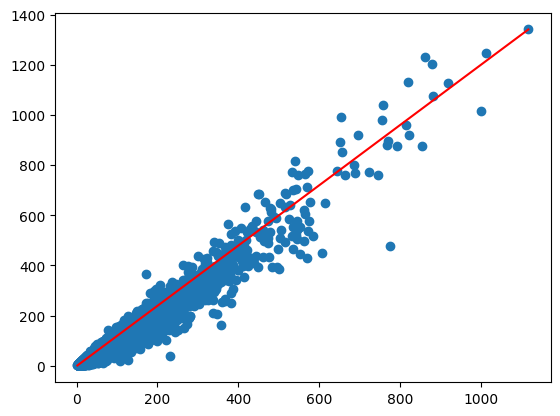

In [11]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(), y_test.max()), color='red')